In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [7]:
#get the data
data = pd.read_csv('indian_liver_patient.csv')

In [8]:
#Get the Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Observation
    -Total 583 Records
    -Total 11 columns
    -columns of data-types includes int64, float64, object

In [55]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [56]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [57]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

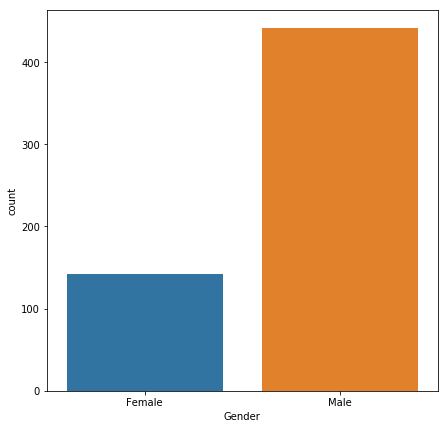

In [54]:
sns.countplot(x='Gender',data=data)

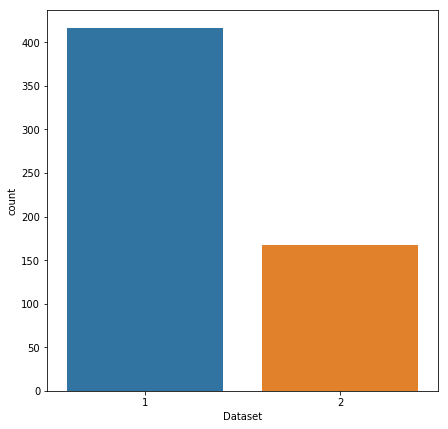

In [48]:
plt.rcParams['figure.figsize']=(7,7)
sns.countplot(x='Dataset',data=data)


### There are only 2 values for Dataset and as given in the description, we will use them as category. We will consider that people with Dataset value =1 has liver disease and Dataset value = 2 has no liver disease

### We will do some analysis based on the Dataset value

In [65]:
people_with_liver_disease = np.sum(data['Dataset'] == 1)
print('Total people(%) with liver disease are',np.sum(data['Dataset'] == 1) / len(data) * 100) 

Total people(%) with liver disease are 71.3550600343


In [66]:
print('Total Females(%) with liver disease are',np.sum((data['Gender'] == 'Female') & (data['Dataset'] == 1)) / people_with_liver_disease * 100) 

Total Females(%) with liver disease are 22.1153846154


In [67]:
print('Total Males(%) with liver disease are',np.sum((data['Gender'] == 'Male') & (data['Dataset'] == 1)) / people_with_liver_disease * 100) 

Total Males(%) with liver disease are 77.8846153846


### Convert the data to dataframe 

In [20]:
df = pd.DataFrame(data)

In [22]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [28]:
df['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [29]:
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

### Obeservation:
    -total male records 441 (~75%)
    -total female records 142 (~25%)
    -416 people in category 1 (~71%)
    -167 people in category 2 (~29%)

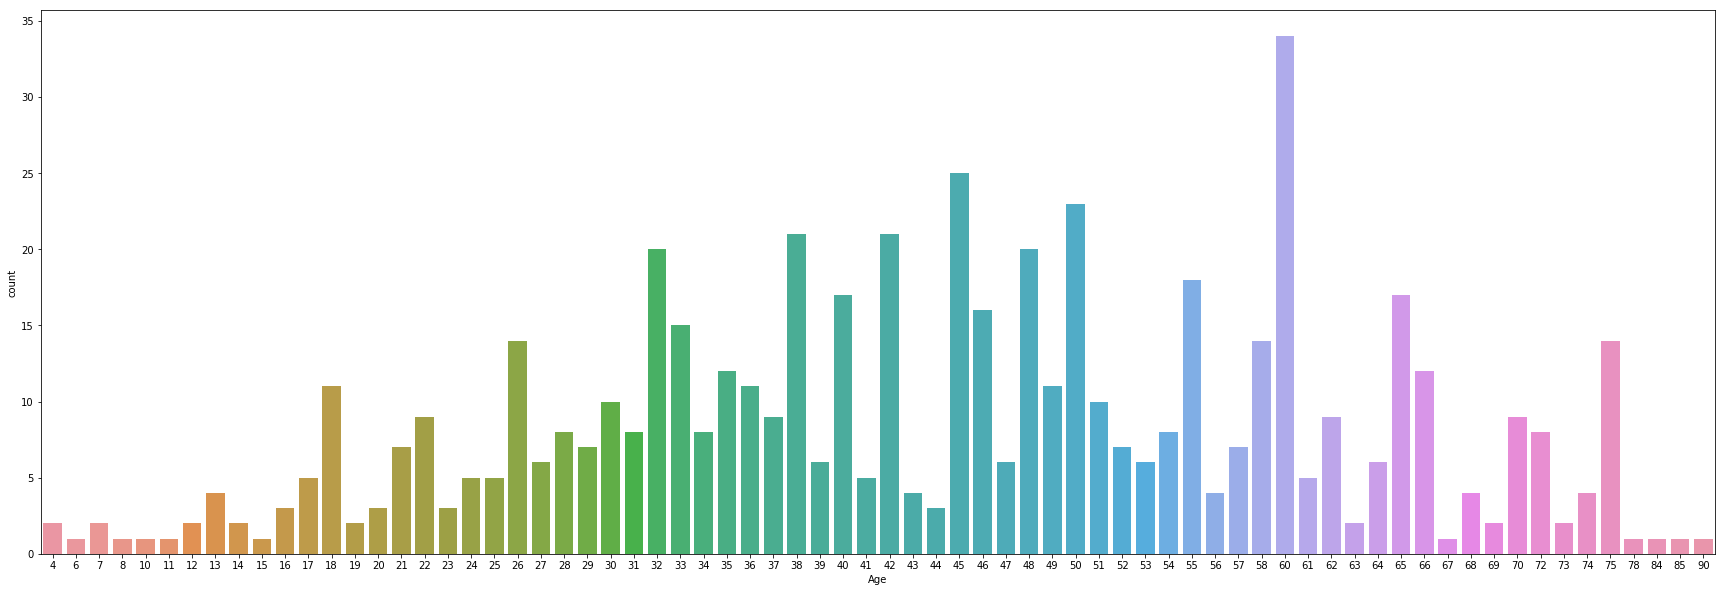

In [38]:
plt.rcParams['figure.figsize']=(30,10)
sns.countplot(x='Age',data = df)